# 🐮**Análisis del genoma bovino en vacas de la raza Holando**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

genotipos = pd.read_excel('/content/tablaGENOTIPOSsnps_7748.xlsx')
genotipos_copia = genotipos.drop(['Nombre','Cromosoma', 'Posicion', 'GenTrainScore', 'NormID'], axis=1)
genotipos_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7759 non-null   int64 
 1   Marcador    7759 non-null   object
 2   BLV.1       7759 non-null   object
 3   BLV.3       7759 non-null   object
 4   BLV.4       7759 non-null   object
 5   BLV.5       7759 non-null   object
 6   BLV.6       7759 non-null   object
 7   BLV.8       7759 non-null   object
 8   BLV.9       7759 non-null   object
 9   BLV.10      7759 non-null   object
 10  BLV.11      7759 non-null   object
 11  BLV.12      7759 non-null   object
 12  BLV.14      7759 non-null   object
 13  BLV.15      7759 non-null   object
 14  BLV.16      7759 non-null   object
 15  BLV.17      7759 non-null   object
 16  BLV.18      7759 non-null   object
 17  BLV.19      7759 non-null   object
 18  BLV.20      7759 non-null   object
 19  BLV.23      7759 non-null   object
 20  BLV.24  

# *¿Cuántos datos faltantes hay en los genotipados?*

In [ ]:
# Calcular la cantidad de datos faltantes ('-/-') en todo el DataFrame
datos_faltantes = (genotipos_copia == '-/-').sum().sum()
datos_faltantes

np.int64(3099)

In [ ]:
#Score de calidad en términos relativos
#se puede hacer por marcador y/o por animal

#contabilizar '-/-' en cada columna (animal)
datos_faltantesxanimal = (((genotipos_copia == '-/-').sum()) / 7759)
datos_faltantesxanimal

,0
Unnamed: 0,0.000000
Marcador,0.000000
BLV.1,0.011728
BLV.3,0.007604
BLV.4,0.045624
BLV.5,0.014177
BLV.6,0.024488
BLV.8,0.007862
BLV.9,0.016626
BLV.10,0.011599


In [ ]:
#contabilizar '-/-' por fila (marcador)
datos_faltantesxmarcador = (((genotipos_copia == '-/-').sum(axis=1)) / 24)
datos_faltantesxmarcador

,0
0,0.000
1,0.000
2,0.000
3,0.125
4,0.000
...,...
7754,1.000
7755,1.000
7756,0.000
7757,1.000


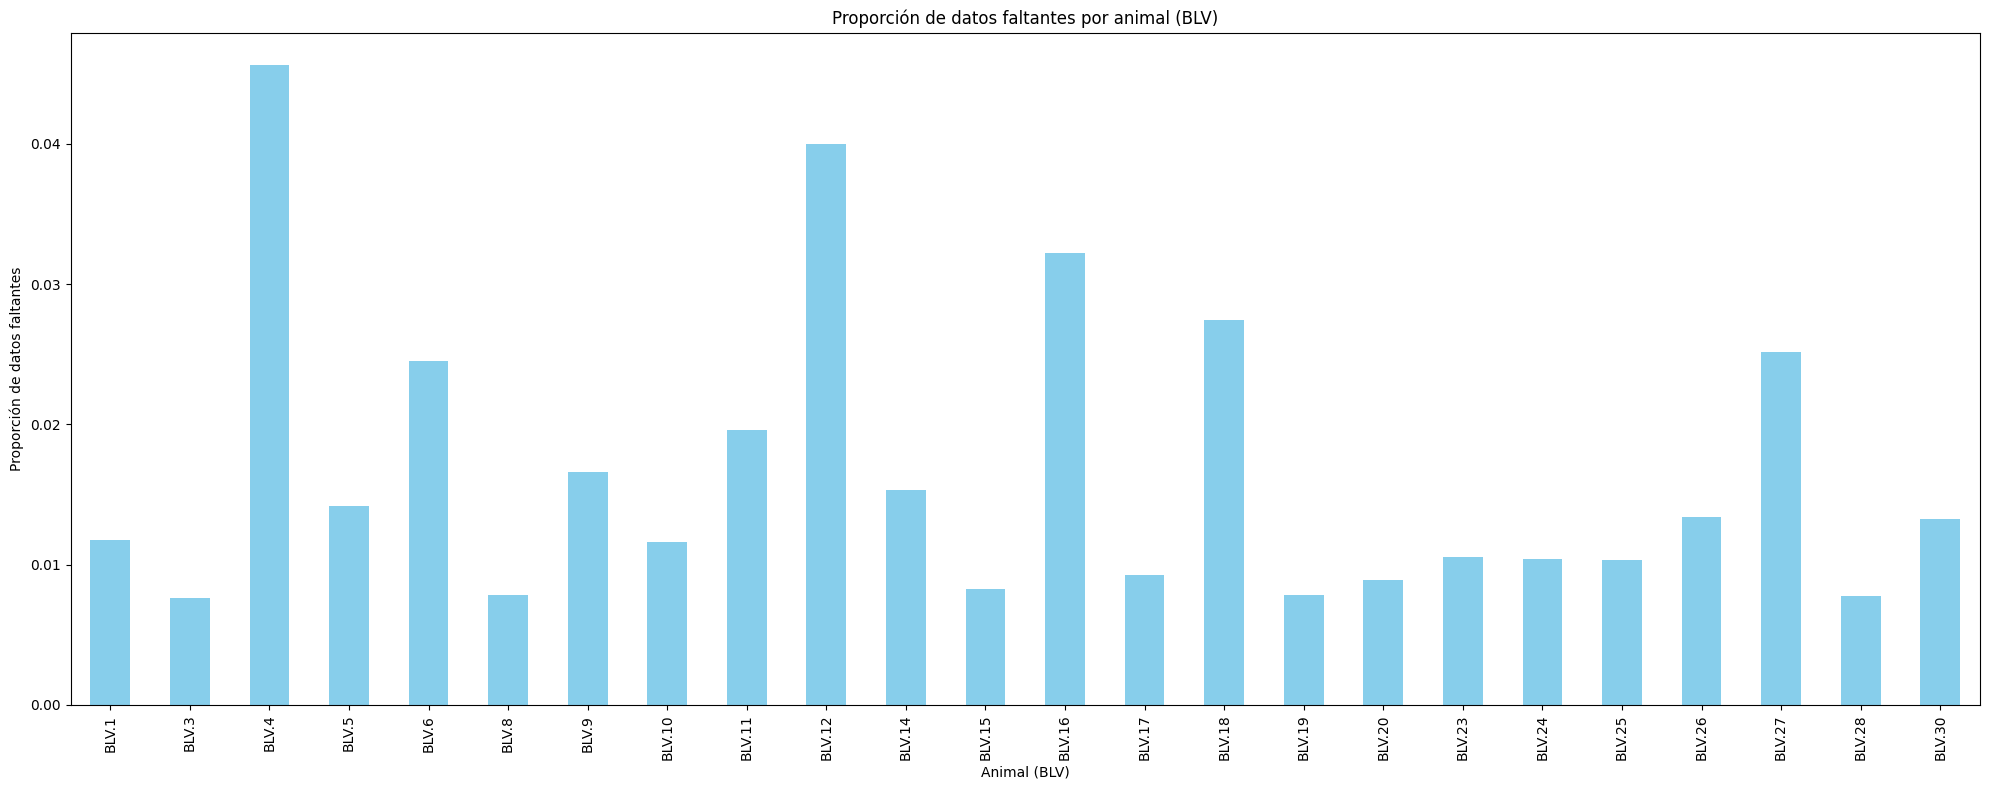

In [ ]:
# graficando proporción de datos faltantes por animal
# seleccionar solo las columnas que comienzan con 'BLV'
columnas_animales_blv = [col for col in genotipos_copia.columns if col.startswith('BLV')]

# Filtrar datos_faltantesxanimal para excluir 'Unnamed: 0' y 'Marcador'
datos_faltantesxanimal_filtrado = datos_faltantesxanimal.drop(['Unnamed: 0', 'Marcador'], errors='ignore')

# Crear el gráfico de barras con los datos filtrados por 'BLV'
plt.figure(figsize=(20, 8))
datos_faltantesxanimal_filtrado.plot(kind='bar', color='skyblue')

plt.title('Proporción de datos faltantes por animal (BLV)')
plt.xlabel('Animal (BLV)')
plt.ylabel('Proporción de datos faltantes')
plt.xticks(rotation=90)
plt.tight_layout()


# --- Código para guardar el gráfico ---
nombre_archivo = 'proporcion_datos_faltantes_por_animal.jpeg'
plt.savefig(nombre_archivo, format='jpeg', dpi=300) # dpi controla la resolución

plt.show()

In [ ]:
# Convertir la Serie a un DataFrame y mantener la información del índice original
df_proporcion = datos_faltantesxmarcador.reset_index()
df_proporcion.columns = ['Original_Index', 'Proporcion_Datos_Faltantes'] # Renombrar para claridad

# Ahora, necesitamos la columna 'Unnamed: 0' original de genotipos_copia.
# Asumimos que el índice de proporcion_datos_faltantesxmarcador corresponde al índice de genotipos_copia.
# Podemos unir o mapear la columna 'Unnamed: 0' a nuestro nuevo DataFrame.
df_proporcion['Unnamed: 0'] = genotipos_copia['Unnamed: 0'].iloc[df_proporcion['Original_Index']].values

# Ordenar los marcadores por la proporción de datos faltantes (opcional, pero útil para visualizar la tendencia)
df_proporcion_ordenado = df_proporcion.sort_values(by='Proporcion_Datos_Faltantes').reset_index(drop=True)

# Crear el gráfico de puntos interactivo con Plotly Express
fig = px.scatter(
    df_proporcion_ordenado,
    x='Unnamed: 0', # Usa la columna 'Unnamed: 0' para el eje X
    y='Proporcion_Datos_Faltantes',
    text='Unnamed: 0', # Muestra el valor de 'Unnamed: 0' al pasar el cursor
    title='Proporción de datos faltantes por marcador (Interactivo)',
    labels={'Unnamed: 0': 'Nro. marcador', 'Proporcion_Datos_Faltantes': 'Proporción de datos faltantes'}
)

# ajustar el tamaño del marcador si es necesario
fig.update_traces(marker=dict(size=5))

# mostrar el nombre del marcador de forma más clara al pasar el cursor
fig.update_layout(hovermode='closest')

fig.show()

# Compartir como html
# Guardar el gráfico interactivo como un archivo HTML
fig.write_html("datos_faltantes_xmarcador.html")


# *Proporción del contenido G+C*

In [ ]:
### calcular para cada loci (cada fila) la proporción de G+C, ya cuento además 'T' y 'A' porque me sirve más adelante

genotipos_copia['Conteo_G'] = 0
genotipos_copia['Conteo_C'] = 0
genotipos_copia['Conteo_T'] = 0
genotipos_copia['Conteo_A'] = 0

for index, row in genotipos_copia.iterrows():
    total_G = 0
    total_C = 0
    total_T = 0
    total_A = 0

#excluir las columnas sobre las cuales no se debe iterar
    cols_to_exclude = ['Unnamed: 0', 'Marcador','Conteo_G', 'Conteo_C','Conteo_T','Conteo_A','Datos_abs_x_marcador', 'Proporcion_GC', 'Total_Non_Missing_Alleles', 'alelo mayor', 'Conteo_Heterocigotos_por_Marcador','Frecuencia_Relativa_Heterocigotos']
    original_genotype_cols = [col for col in genotipos_copia.columns if col not in cols_to_exclude]


    for col in original_genotype_cols:
        genotype = row[col]
        # Chequear si es str y que no sea vacío
        if isinstance(genotype, str) and genotype != '-/-':
            # separar en alelos
            alelos = genotype.split('/')
            # Contar 'G' y 'C'
            total_G += alelos.count('G')
            total_C += alelos.count('C')
            total_T += alelos.count('T')
            total_A += alelos.count('A')

    # Guardar el valor total
    genotipos_copia.loc[index, 'Conteo_G'] = total_G
    genotipos_copia.loc[index, 'Conteo_C'] = total_C
    genotipos_copia.loc[index, 'Conteo_T'] = total_T
    genotipos_copia.loc[index, 'Conteo_A'] = total_A

# Mirar los primeros valores de las nuevas columnas
print(genotipos_copia[['Conteo_G', 'Conteo_C', 'Conteo_T', 'Conteo_A']].head())

#calcular la cantidad de datos que hay por fila (para no tener en cuenta los datos faltantes)
genotipos_copia['Datos_abs_x_marcador'] = (genotipos_copia[original_genotype_cols] != '-/-').sum(axis=1) *2

#Calcular la proporción de contenido G y C por marcador, teniendo en cuenta el número absoluto de datos que hay en la fila
genotipos_copia['Proporcion_GC'] = (genotipos_copia['Conteo_G'] + genotipos_copia['Conteo_C']) / genotipos_copia['Datos_abs_x_marcador']

#creo un nuevo data frame con las columnas útiles para la consulta
df_contenido_gc = genotipos_copia[['Marcador','Conteo_G', 'Conteo_C', 'Datos_abs_x_marcador', 'Proporcion_GC']]
conteo_bases = genotipos_copia[['Conteo_G','Conteo_C','Conteo_T','Conteo_A']]
print(df_contenido_gc) ### NOTAR QUE CUENTA DESDE CERO

   Conteo_G  Conteo_C  Conteo_T  Conteo_A
0         0        31        17         0
1        28         0         0        20
2         3         0         0        45
3         3         0         0        39
4         0        12        36         0
                Marcador  Conteo_G  Conteo_C  Datos_abs_x_marcador  \
0     BovineHD0100000183         0        31                    48   
1     BovineHD0100000267        28         0                    48   
2     BovineHD0100000343         3         0                    48   
3     BovineHD0100000347         3         0                    42   
4     BovineHD0100000363         0        12                    48   
...                  ...       ...       ...                   ...   
7754  BovineHD3100000953         0         0                     0   
7755  BovineHD3100001212         0         0                     0   
7756  BovineHD3100001716        10         0                    48   
7757  BovineHD3100001971         0         0    

In [ ]:
print(original_genotype_cols)

['BLV.1', 'BLV.3', 'BLV.4', 'BLV.5', 'BLV.6', 'BLV.8', 'BLV.9', 'BLV.10', 'BLV.11', 'BLV.12', 'BLV.14', 'BLV.15', 'BLV.16', 'BLV.17', 'BLV.18', 'BLV.19', 'BLV.20', 'BLV.23', 'BLV.24', 'BLV.25', 'BLV.26', 'BLV.27', 'BLV.28', 'BLV.30']


In [ ]:
genotipos_copia.columns

Index(['Unnamed: 0', 'Marcador', 'BLV.1', 'BLV.3', 'BLV.4', 'BLV.5', 'BLV.6',
       'BLV.8', 'BLV.9', 'BLV.10', 'BLV.11', 'BLV.12', 'BLV.14', 'BLV.15',
       'BLV.16', 'BLV.17', 'BLV.18', 'BLV.19', 'BLV.20', 'BLV.23', 'BLV.24',
       'BLV.25', 'BLV.26', 'BLV.27', 'BLV.28', 'BLV.30', 'Conteo_G',
       'Conteo_C', 'Conteo_T', 'Conteo_A', 'Datos_abs_x_marcador',
       'Proporcion_GC'],
      dtype='object')

In [ ]:
# graficar la proporción de contenido G+C por locus
# Calcular los estadísticos resumen para la columna 'Proporcion_GC'
estadisticas_gc = genotipos_copia['Proporcion_GC'].describe()
print(estadisticas_gc)

count    7739.000000
mean        0.511186
std         0.330727
min         0.000000
25%         0.229167
50%         0.520833
75%         0.812500
max         1.000000
Name: Proporcion_GC, dtype: float64


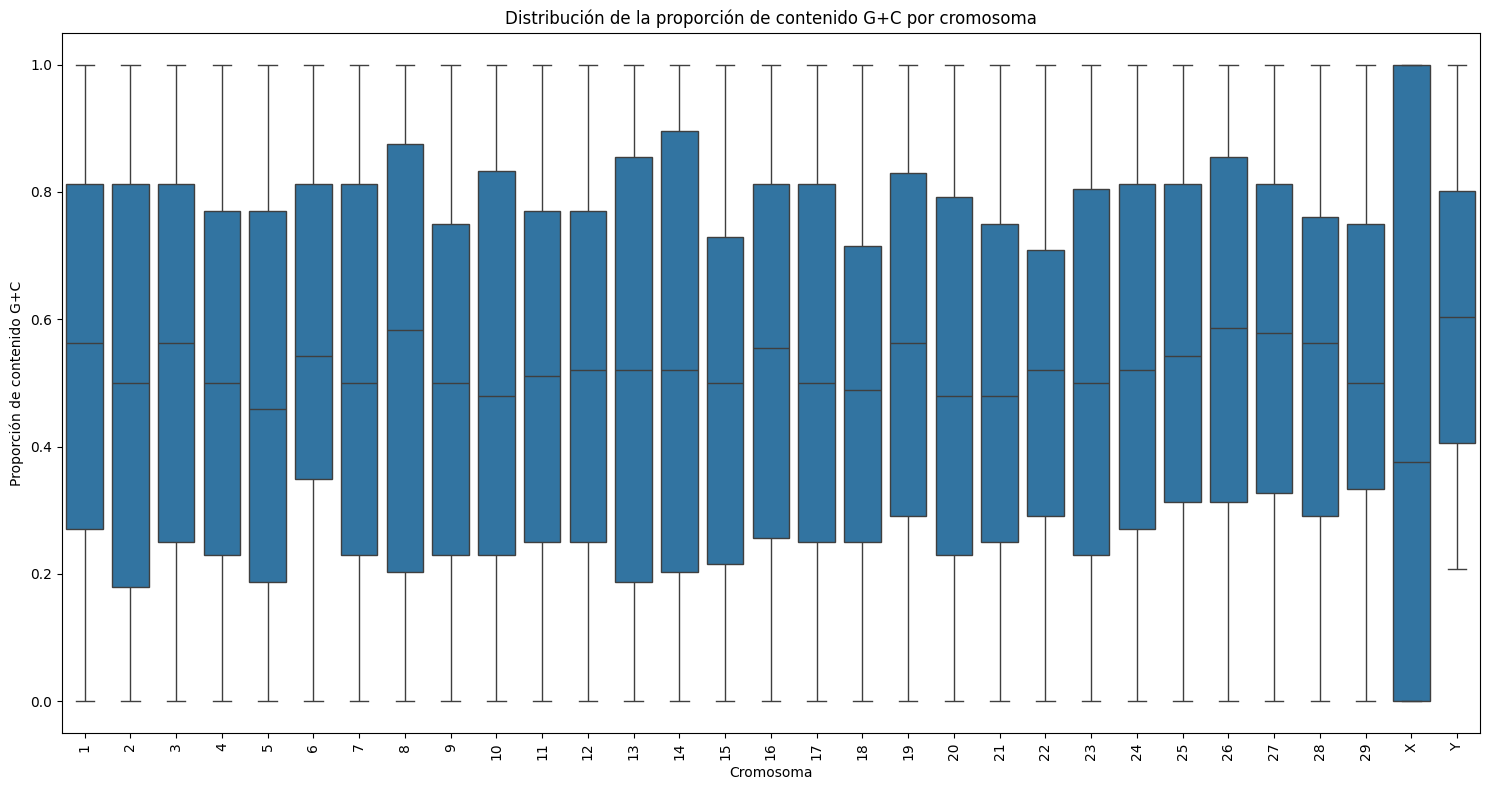

In [ ]:
# contenido gc por cromosoma

#unir la columna cromosoma que estaba en el df original
genotipos_copia_con_cromosoma = genotipos_copia.merge(genotipos[['Marcador', 'Cromosoma']], on='Marcador', how='left')

# eliminar las filas con valores NaN en 'Cromosoma' o 'Proporcion_GC' si es necesario
genotipos_copia_con_cromosoma.dropna(subset=['Cromosoma', 'Proporcion_GC'], inplace=True)

# asegurarse que cromosoma es str
genotipos_copia_con_cromosoma['Cromosoma'] = genotipos_copia_con_cromosoma['Cromosoma'].astype(str)

# ordenar los cromosomas por orden ascendente y al final los cromosomas sexuales
# convertir cromosoma a numérico para ordenarlos
cromosomas_numericos = sorted([c for c in genotipos_copia_con_cromosoma['Cromosoma'].unique() if c.isdigit()], key=int)
cromosomas_no_numericos = ['X', 'Y'] # orden de cromosomas no numéricos
orden_cromosomas = cromosomas_numericos + cromosomas_no_numericos

# convertir la columna 'Cromosoma' a un tipo categórico con el orden personalizado
genotipos_copia_con_cromosoma['Cromosoma'] = pd.Categorical(genotipos_copia_con_cromosoma['Cromosoma'], categories=orden_cromosomas, ordered=True)

# ordenar el df por la columna categórica
genotipos_copia_con_cromosoma_ordenado = genotipos_copia_con_cromosoma.sort_values(by='Cromosoma')

# crear un box plot usando seaborn con los datos ordenados
plt.figure(figsize=(15, 8))
sns.boxplot(x='Cromosoma', y='Proporcion_GC', data=genotipos_copia_con_cromosoma_ordenado)

plt.title('Distribución de la proporción de contenido G+C por cromosoma')
plt.xlabel('Cromosoma')
plt.ylabel('Proporción de contenido G+C')
plt.xticks(rotation=90)
plt.tight_layout()

# --- Código para guardar el gráfico ---
nombre_archivo = 'distribucion_gc_xcromosoma.jpeg'
plt.savefig(nombre_archivo, format='jpeg', dpi=300) # dpi controla la resolución

plt.show()

# *Calcular para cada animal la proporción de loci heterocigotas*

In [ ]:
# para cada animal (cada columna) contabilizar la cantidad de loci en que las bases no se repiten (heterocigosis)
#A/G, A/C, A/T, T/C, T/G, T/A, C/G, G/C

# La idea es iterar sobre cada columna y registrar la cantidad de loci heterocigotas
heterocigosis_por_animal = {} # se crea un diccionario para mantener registro por cada animal

# Lista con loci heterocigotos posibles
genotipos_heterocigotos = ['A/G', 'A/C', 'A/T', 'T/C', 'T/G', 'T/A', 'C/G', 'G/C']

# Obtener los nombres de las columnas que representan a los animales (excluir 'Unnamed: 0' y 'Marcador')
columnas_animales = [col for col in genotipos_copia.columns if col not in ['Unnamed: 0', 'Marcador']]

for nombre_animal in columnas_animales:
    contador_heterocigotos = 0
    # iterar por el genoma de cada animal
    for par_de_bases in genotipos_copia[nombre_animal]:
        # Verificar si es una cadena y no es un dato faltante
        if isinstance(par_de_bases, str) and par_de_bases != '-/-':
            # chequear si hace parte de la lista de genotipos heterocigotos
            if par_de_bases in genotipos_heterocigotos:
                contador_heterocigotos += 1

    # Almacenar el conteo absoluto de heterocigotos por animal
    heterocigosis_por_animal[nombre_animal] = contador_heterocigotos

# finalmente el diccionario contabiliza la cantidad de loci heterocigotos por animal
print("Cantidad absoluta de loci heterocigotos por animal:")
print(heterocigosis_por_animal)

# convertir a data frame los conteos absolutos
heterocigosis_x_animal_df = pd.DataFrame(list(heterocigosis_por_animal.items()), columns=['Animal', 'Cantidad de loci heterocigotas (absoluta)'])

# Obtener el número total de loci (filas)
total_loci = len(genotipos_copia)

# Calcular la proporción de loci heterocigotos dividiendo por el total de loci
heterocigosis_x_animal_df['Proporción de loci heterocigotas (total)'] = heterocigosis_x_animal_df['Cantidad de loci heterocigotas (absoluta)'] / total_loci

# Restar la proporción de datos faltantes por animal
# Asegurarse de que los índices de datos_faltantesxanimal coincidan con los de heterocigosis_x_animal_df
# Creamos un DataFrame temporal de datos faltantes para alinearlo fácilmente
datos_faltantes_df_temp = datos_faltantesxanimal.drop(['Unnamed: 0', 'Marcador'], errors='ignore').reset_index()
datos_faltantes_df_temp.columns = ['Animal', 'Proporción_datos_faltantes']

# Unir los dataframes para poder restar correctamente
heterocigosis_x_animal_df = pd.merge(heterocigosis_x_animal_df, datos_faltantes_df_temp, on='Animal', how='left')

# Realizar la resta
heterocigosis_x_animal_df['Proporción loci heterocigotos por animal'] = heterocigosis_x_animal_df['Proporción de loci heterocigotas (total)'] - heterocigosis_x_animal_df['Proporción_datos_faltantes']

print("\nDataFrame con cantidad absoluta, proporción sobre total de loci y el resultado final:")
print(heterocigosis_x_animal_df)

Cantidad absoluta de loci heterocigotos por animal:
{'BLV.1': 2242, 'BLV.3': 2241, 'BLV.4': 2176, 'BLV.5': 2273, 'BLV.6': 2243, 'BLV.8': 2259, 'BLV.9': 2198, 'BLV.10': 2211, 'BLV.11': 2192, 'BLV.12': 2403, 'BLV.14': 2298, 'BLV.15': 2234, 'BLV.16': 2242, 'BLV.17': 2282, 'BLV.18': 2446, 'BLV.19': 2271, 'BLV.20': 2285, 'BLV.23': 2237, 'BLV.24': 2181, 'BLV.25': 2287, 'BLV.26': 2365, 'BLV.27': 2283, 'BLV.28': 2467, 'BLV.30': 2433, 'Conteo_G': 0, 'Conteo_C': 0, 'Conteo_T': 0, 'Conteo_A': 0, 'Datos_abs_x_marcador': 0, 'Proporcion_GC': 0}

DataFrame con cantidad absoluta, proporción sobre total de loci y el resultado final:
                  Animal  Cantidad de loci heterocigotas (absoluta)  \
0                  BLV.1                                       2242   
1                  BLV.3                                       2241   
2                  BLV.4                                       2176   
3                  BLV.5                                       2273   
4                  BL

In [ ]:
columnas_animales_hetero = heterocigosis_x_animal_df[heterocigosis_x_animal_df['Animal'].str.startswith('BLV')]

fig = px.bar(
    columnas_animales_hetero,
    x='Animal',
    y='Proporción loci heterocigotos por animal',
    title='Proporción de loci heterocigotos por animal (BLV)',
)

fig.update_layout(xaxis_tickangle=-90)

fig.show()

fig.write_html("loci_heterocigotos_xanimal.html")

# *Para cada locus crear 3 columnas que describan el conteo de cada uno de los 3 genotipos posibles*

In [ ]:
#para cada marcador (fila) contabilizar las tres combinaciones posibles
# Lista de todos los genotipos posibles especificados
genotipos_posibles = ['A/G', 'A/C', 'A/T', 'T/C', 'T/G', 'T/A', 'C/G', 'G/C', 'G/G', 'C/C', 'T/T', 'A/A'] # suma a los heterocigotos los casos homocigotos

# Crea un nuevo DataFrame para almacenar los conteos de genotipos
# Las filas de este nuevo DataFrame corresponderán a los loci (marcadores)
# Las columnas corresponderán a los genotipos posibles
columnas_conteo = [f'Count_{genotipo.replace("/", "_")}' for genotipo in genotipos_posibles]
conteo_genotipos_df = pd.DataFrame(0, index=genotipos_copia.index, columns=columnas_conteo)

cols_to_exclude = ['Unnamed: 0', 'Marcador','Conteo_G', 'Conteo_C', 'Conteo_T', 'Conteo_A', 'Datos_abs_x_marcador', 'Proporcion_GC', 'alelo mayor']
cols_to_exclude.extend(columnas_conteo)

columnas_genotipos_originales = [col for col in genotipos_copia.columns if col not in cols_to_exclude]

# Iterar a través de cada fila (locus) del DataFrame original
for index, row in genotipos_copia.iterrows():
    # Iterar a través de las columnas de genotipos en la fila actual
    for col in columnas_genotipos_originales:
        genotipo_en_celda = row[col]
        # Verificar si el genotipo en la celda está en nuestra lista de genotipos posibles y no es un dato faltante
        if isinstance(genotipo_en_celda, str) and genotipo_en_celda != '-/-' and genotipo_en_celda in genotipos_posibles:
            # Incrementar el contador en el nuevo DataFrame para ese genotipo y esa fila (locus)
            nombre_columna_conteo = f'Count_{genotipo_en_celda.replace("/", "_")}'
            conteo_genotipos_df.loc[index, nombre_columna_conteo] += 1

# Mostrar las primeras filas del nuevo DataFrame llamado conteo_genotipos_df para verificar
print(conteo_genotipos_df.head())

   Count_A_G  Count_A_C  Count_A_T  Count_T_C  Count_T_G  Count_T_A  \
0          0          0          0         13          0          0   
1         12          0          0          0          0          0   
2          3          0          0          0          0          0   
3          3          0          0          0          0          0   
4          0          0          0          8          0          0   

   Count_C_G  Count_G_C  Count_G_G  Count_C_C  Count_T_T  Count_A_A  
0          0          0          0          9          2          0  
1          0          0          8          0          0          4  
2          0          0          0          0          0         21  
3          0          0          0          0          0         18  
4          0          0          0          2         14          0  


# *Calcular para cada locus la frecuencia relativa de genotipos heterocigotas observada*

In [ ]:
# Lista con loci heterocigotos posibles
genotipos_heterocigotos = ['A/G', 'A/C', 'A/T', 'T/C', 'T/G', 'T/A', 'C/G', 'G/C']

# Crea una nueva columna para almacenar el conteo de heterocigotos por marcador
genotipos_copia['Conteo_Heterocigotos_por_Marcador'] = 0

# Define las columnas a excluir para no incluirlas en la iteración de genotipos
# Asegúrate de incluir todas las columnas no relacionadas con los genotipos de los animales
cols_to_exclude = ['Unnamed: 0', 'Marcador','Conteo_G', 'Conteo_C','Conteo_T','Conteo_A','Datos_abs_x_marcador', 'Proporcion_GC', 'Total_Non_Missing_Alleles', 'Conteo_Heterocigotos_por_Marcador', 'alelo mayor']

# Obtiene los nombres de las columnas que contienen los genotipos de los animales
original_genotype_cols = [col for col in genotipos_copia.columns if col not in cols_to_exclude]


# Itera a través de cada fila del DataFrame
for index, row in genotipos_copia.iterrows():
    contador_heterocigotos = 0
    # Itera a través de las columnas que representan los genotipos de los animales
    for col in original_genotype_cols:
        genotipo = row[col]
        # Chequea si es str y que no sea un dato faltante
        if isinstance(genotipo, str) and genotipo != '-/-':
            # Chequea si el genotipo es heterocigoto
            if genotipo in genotipos_heterocigotos:
                contador_heterocigotos += 1
    # Almacena el conteo en la nueva columna para la fila actual
    genotipos_copia.loc[index, 'Conteo_Heterocigotos_por_Marcador'] = contador_heterocigotos

## Calcular la frecuencia relativa de genotipos heterocigotas observada por marcador
# Utiliza la columna 'Conteo_Heterocigotos_por_Marcador' y 'Datos_abs_x_marcador'
genotipos_copia['Frecuencia_Relativa_Heterocigotos'] = genotipos_copia['Conteo_Heterocigotos_por_Marcador'] / (genotipos_copia['Datos_abs_x_marcador']/2)

# Muestra las primeras filas con la nueva columna de frecuencia relativa para verificar
print(genotipos_copia[['Marcador', 'Conteo_Heterocigotos_por_Marcador', 'Datos_abs_x_marcador', 'Frecuencia_Relativa_Heterocigotos']])
# Crear Dataframe
heterocigotos_x_marcador = genotipos_copia[['Marcador', 'Conteo_Heterocigotos_por_Marcador', 'Datos_abs_x_marcador', 'Frecuencia_Relativa_Heterocigotos']]


                Marcador  Conteo_Heterocigotos_por_Marcador  \
0     BovineHD0100000183                                 13   
1     BovineHD0100000267                                 12   
2     BovineHD0100000343                                  3   
3     BovineHD0100000347                                  3   
4     BovineHD0100000363                                  8   
...                  ...                                ...   
7754  BovineHD3100000953                                  0   
7755  BovineHD3100001212                                  0   
7756  BovineHD3100001716                                 10   
7757  BovineHD3100001971                                  0   
7758  BovineHD3100002134                                  0   

      Datos_abs_x_marcador  Frecuencia_Relativa_Heterocigotos  
0                       48                           0.541667  
1                       48                           0.500000  
2                       48                         

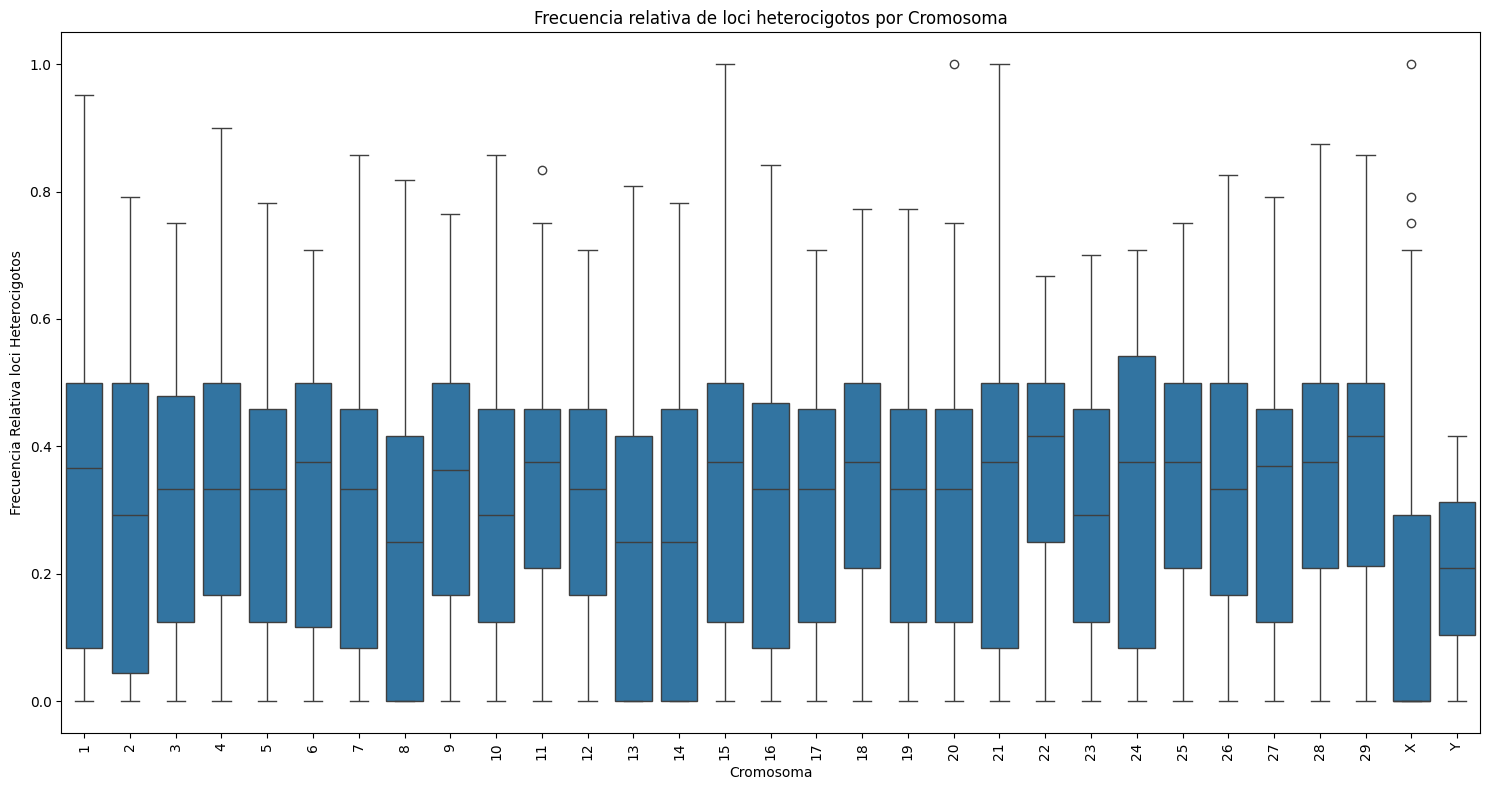

In [ ]:
#unir la columna cromosoma que estaba en el df original
genotipos_copia_con_cromosoma = genotipos_copia.merge(genotipos[['Marcador', 'Cromosoma']], on='Marcador', how='left')

# eliminar las filas con valores NaN en 'Cromosoma' o 'Proporcion_GC' si es necesario
genotipos_copia_con_cromosoma.dropna(subset=['Cromosoma', 'Frecuencia_Relativa_Heterocigotos'], inplace=True)

# asegurarse que cromosoma es str
genotipos_copia_con_cromosoma['Cromosoma'] = genotipos_copia_con_cromosoma['Cromosoma'].astype(str)

# ordenar los cromosomas por orden ascendente y al final los cromosomas sexuales
# convertir cromosoma a numérico para ordenarlos
cromosomas_numericos = sorted([c for c in genotipos_copia_con_cromosoma['Cromosoma'].unique() if c.isdigit()], key=int)
cromosomas_no_numericos = ['X', 'Y'] # orden de cromosomas no numéricos
orden_cromosomas = cromosomas_numericos + cromosomas_no_numericos

# convertir la columna 'Cromosoma' a un tipo categórico con el orden personalizado
genotipos_copia_con_cromosoma['Cromosoma'] = pd.Categorical(genotipos_copia_con_cromosoma['Cromosoma'], categories=orden_cromosomas, ordered=True)

# ordenar el df por la columna categórica
genotipos_copia_con_cromosoma_ordenado = genotipos_copia_con_cromosoma.sort_values(by='Cromosoma')

# crear un box plot usando seaborn con los datos ordenados
plt.figure(figsize=(15, 8))
sns.boxplot(x='Cromosoma', y='Frecuencia_Relativa_Heterocigotos', data=genotipos_copia_con_cromosoma_ordenado)

plt.title('Frecuencia relativa de loci heterocigotos por Cromosoma')
plt.xlabel('Cromosoma')
plt.ylabel('Frecuencia Relativa loci Heterocigotos')
plt.xticks(rotation=90)
plt.tight_layout()


# --- Código para guardar el gráfico ---
nombre_archivo = 'frecuencia_heterocigotos_xcromosoma.jpeg'
plt.savefig(nombre_archivo, format='jpeg', dpi=300) # dpi controla la resolución

plt.show()

# *Calcular para cada locus las frecuencias alélicas y las frecuencias esperadas para los 3 genotipos si el locus se encontrase en equilibrio de Hardy-Weinberg*

In [ ]:
### primero calculo para cada locus las frecuencias alélicas
# necesito que en 'conteo_genotipos_df' identifique los homocigotos y heterocigotos por fila y que almacene sus valores absolutos en columnas llamadas [Homocigoto_1], [Heterocigoto], [Homocigoto_2]
# luego que copie esas mismas columnas a un nuevo df:
#nuevas columnas llamadas: [homocigoto_1_hw],[heterocigoto_hw],[homocigoto_2_hw] en el nuevo df llamado: Hardy_Weinberg

#a partir de esto calcular las frecuencias alélicas generando las nuevas columnas [p] y [q]
# p = ([homocigoto_1_hw]*2 + [heterocigoto_hw]) / ['Datos_abs_x_marcador']
# q = 1 - p

#Frecuencias genotípicas esperadas guardadas en columnas nuevas llamadas [P (Homocigotos)], [H (Heterocigotos)] y [Q (Homocigotos)] calculadas usando las columnas [p] y [q]
# P = p**2
# H = 2 * p * q
# Q = q ** 2


In [ ]:
# Identificar los genotipos homocigotos y heterocigotos
homocigotos = ['G/G', 'C/C', 'T/T', 'A/A']
heterocigotos = ['A/G', 'A/C', 'A/T', 'T/C', 'T/G', 'C/G']

# Crear las nuevas columnas en conteo_genotipos_df
conteo_genotipos_df['Marcador'] = genotipos_copia['Marcador']
conteo_genotipos_df['homocigoto_1'] = 0
conteo_genotipos_df['heterocigoto'] = 0
conteo_genotipos_df['homocigoto_2'] = 0

# Sumar los conteos para cada categoría
for index, row in conteo_genotipos_df.iterrows():
    # Sumar todos los heterocigotos
    heterocigoto_total = sum(row[f'Count_{geno.replace("/", "_")}'] for geno in heterocigotos)
    conteo_genotipos_df.at[index, 'heterocigoto'] = heterocigoto_total
# Versión alternativa que separa homocigotos en dos grupos basados en frecuencia
for index, row in conteo_genotipos_df.iterrows():
    # Obtener frecuencias de cada homocigoto
    homocigoto_counts = {geno: row[f'Count_{geno.replace("/", "_")}'] for geno in homocigotos}

    # Ordenar homocigotos por frecuencia descendente
    sorted_homocigotos = sorted(homocigoto_counts.items(), key=lambda x: x[1], reverse=True)

    # Asignar los dos homocigotos más frecuentes (si existen)
    if len(sorted_homocigotos) > 0:
        conteo_genotipos_df.at[index, 'homocigoto_1'] = sorted_homocigotos[0][1]
    if len(sorted_homocigotos) > 1:
        conteo_genotipos_df.at[index, 'homocigoto_2'] = sorted_homocigotos[1][1]

    # Sumar todos los heterocigotos
    heterocigoto_total = sum(row[f'Count_{geno.replace("/", "_")}'] for geno in heterocigotos)
    conteo_genotipos_df.at[index, 'heterocigoto'] = heterocigoto_total

print(conteo_genotipos_df[['Marcador','homocigoto_1', 'heterocigoto', 'homocigoto_2']].head())

             Marcador  homocigoto_1  heterocigoto  homocigoto_2
0  BovineHD0100000183             9            13             2
1  BovineHD0100000267             8            12             4
2  BovineHD0100000343            21             3             0
3  BovineHD0100000347            18             3             0
4  BovineHD0100000363            14             8             2


In [ ]:
# 1. Traer la columna 'Datos_abs_x_marcador' a conteo_genotipos_df
# Asegúrate de que los índices de ambos DataFrames coincidan
conteo_genotipos_df['Datos_abs_x_marcador'] = genotipos_copia['Datos_abs_x_marcador']
conteo_genotipos_df['Marcador'] = genotipos_copia['Marcador']

# 2. Calcular la columna 'p'
# Reemplaza los 0 en 'Datos_abs_x_marcador' con NaN para evitar división por cero
divisor = conteo_genotipos_df['Datos_abs_x_marcador'].replace(0, np.nan)
conteo_genotipos_df['p'] = (conteo_genotipos_df['homocigoto_1'] * 2 + conteo_genotipos_df['heterocigoto']) / divisor

# 3. Calcular la columna 'q'
conteo_genotipos_df['q'] = 1 - conteo_genotipos_df['p']

# Mostrar las primeras filas del DataFrame para verificar
print(conteo_genotipos_df[['homocigoto_1', 'heterocigoto', 'Datos_abs_x_marcador', 'p', 'q']].head())

#Crear columnas [P], [H] y [Q]
conteo_genotipos_df['P'] = (conteo_genotipos_df['p']**2) * (conteo_genotipos_df['Datos_abs_x_marcador']/2)
conteo_genotipos_df['H'] = (2 * conteo_genotipos_df['p'] * (conteo_genotipos_df['q']) * conteo_genotipos_df['Datos_abs_x_marcador']/2)
conteo_genotipos_df['Q'] = (conteo_genotipos_df['q']**2) * (conteo_genotipos_df['Datos_abs_x_marcador']/2)

conteo_genotipos_df.head()

   homocigoto_1  heterocigoto  Datos_abs_x_marcador         p         q
0             9            13                    48  0.645833  0.354167
1             8            12                    48  0.583333  0.416667
2            21             3                    48  0.937500  0.062500
3            18             3                    42  0.928571  0.071429
4            14             8                    48  0.750000  0.250000


,Count_A_G,Count_A_C,Count_A_T,Count_T_C,Count_T_G,Count_T_A,Count_C_G,Count_G_C,Count_G_G,Count_C_C,...,Marcador,homocigoto_1,heterocigoto,homocigoto_2,Datos_abs_x_marcador,p,q,P,H,Q
0,0,0,0,13,0,0,0,0,0,9,...,BovineHD0100000183,9,13,2,48,0.645833,0.354167,10.010417,10.979167,3.010417
1,12,0,0,0,0,0,0,0,8,0,...,BovineHD0100000267,8,12,4,48,0.583333,0.416667,8.166667,11.666667,4.166667
2,3,0,0,0,0,0,0,0,0,0,...,BovineHD0100000343,21,3,0,48,0.937500,0.062500,21.093750,2.812500,0.093750
3,3,0,0,0,0,0,0,0,0,0,...,BovineHD0100000347,18,3,0,42,0.928571,0.071429,18.107143,2.785714,0.107143
4,0,0,0,8,0,0,0,0,0,2,...,BovineHD0100000363,14,8,2,48,0.750000,0.250000,13.500000,9.000000,1.500000


# *Realizar para cada locus una prueba de chi-cuadrado y determinar si se encuentra en equilibrio de Hardy-Weinberg considerando un alfa=0,0001 (0,01%).*

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

conteo_genotipos_df['Marcador'] = genotipos_copia['Marcador']

# Define el nivel de significancia
alfa = 0.0001

# Crea nuevas columnas para almacenar los resultados de la prueba de chi-cuadrado
conteo_genotipos_df['Chi_cuadrado'] = np.nan
conteo_genotipos_df['p_valor'] = np.nan
conteo_genotipos_df['grados_de_libertad'] = np.nan
conteo_genotipos_df['Hardy_Weinberg_Equilibrio'] = None

# Itera a través de cada fila (locus)
for index, row in conteo_genotipos_df.iterrows():
    # Obtén las frecuencias observadas y esperadas para los tres genotipos
    observado = [row['homocigoto_1'], row['heterocigoto'], row['homocigoto_2']]
    esperado = [row['P'], row['H'], row['Q']]

    # Verifica si todos los valores observados son NaN o si la suma es cero
    if all(np.isnan(observado)) or sum(o for o in observado if not np.isnan(o)) == 0:
         conteo_genotipos_df.loc[index, 'Hardy_Weinberg_Equilibrio'] = np.nan # Clasificar como NaN
         conteo_genotipos_df.loc[index, 'Chi_cuadrado'] = np.nan
         conteo_genotipos_df.loc[index, 'p_valor'] = np.nan
         conteo_genotipos_df.loc[index, 'grados_de_libertad'] = np.nan
         continue # Pasa a la siguiente fila

    # Verifica si solo hay un tipo de genotipo observado
    non_zero_observed = [o for o in observado if o > 0]
    if len(non_zero_observed) <= 1:
        conteo_genotipos_df.loc[index, 'Hardy_Weinberg_Equilibrio'] = 'No' # Clasificar como No
        conteo_genotipos_df.loc[index, 'Chi_cuadrado'] = np.nan
        conteo_genotipos_df.loc[index, 'p_valor'] = np.nan
        conteo_genotipos_df.loc[index, 'grados_de_libertad'] = np.nan
        continue # Pasa a la siguiente fila


    try:
        # Realiza la prueba de chi-cuadrado
        # Asegúrate de que los datos pasados a chi2_contingency no sean NaN
        valid_observado = [o for o in observado if not np.isnan(o)]
        valid_esperado = [e for e in esperado if not np.isnan(e)]

        # chi2_contingency espera una tabla de contingencia, no dos listas separadas
        # Creamos una tabla de contingencia simple con una fila observada y una esperada
        if len(valid_observado) == len(valid_esperado) and len(valid_observado) > 1: # Se necesitan al menos dos categorías
            chi2_statistic, p_value, dof, expected_counts = chi2_contingency([valid_observado, valid_esperado])

            # Almacena los resultados
            conteo_genotipos_df.loc[index, 'Chi_cuadrado'] = chi2_statistic
            conteo_genotipos_df.loc[index, 'p_valor'] = p_value
            conteo_genotipos_df.loc[index, 'grados_de_libertad'] = dof

            # Determina si el locus está en equilibrio de Hardy-Weinberg based on p-value
            if p_value < alfa:
                conteo_genotipos_df.loc[index, 'Hardy_Weinberg_Equilibrio'] = 'No'  # Reject H0
            else:
                conteo_genotipos_df.loc[index, 'Hardy_Weinberg_Equilibrio'] = 'Si'  # Fail to reject H0
        else:
            conteo_genotipos_df.loc[index, 'Hardy_Weinberg_Equilibrio'] = 'No' # Insuficientes categorías válidas para chi2
            conteo_genotipos_df.loc[index, 'Chi_cuadrado'] = np.nan
            conteo_genotipos_df.loc[index, 'p_valor'] = np.nan
            conteo_genotipos_df.loc[index, 'grados_de_libertad'] = np.nan


    except ValueError as e:
        # If a ValueError occurs during chi2_contingency, classify as 'No'.
        conteo_genotipos_df.loc[index, 'Hardy_Weinberg_Equilibrio'] = 'No'
        conteo_genotipos_df.loc[index, 'Chi_cuadrado'] = np.nan  # Keep chi2 results as NaN since test wasn't valid
        conteo_genotipos_df.loc[index, 'p_valor'] = np.nan
        conteo_genotipos_df.loc[index, 'grados_de_libertad'] = np.nan
        pass  # Continue with the next row


# Muestra las primeras filas del DataFrame con los resultados de la prueba de chi-cuadrado
print(conteo_genotipos_df[['Marcador', 'Chi_cuadrado', 'p_valor', 'grados_de_libertad', 'Hardy_Weinberg_Equilibrio']])

# Contar los valores 'Si', 'No' y NaN
conteo_hw = conteo_genotipos_df['Hardy_Weinberg_Equilibrio'].value_counts(dropna=False)

# Obtener los conteos
conteo_si = conteo_hw.get('Si', 0)
conteo_no = conteo_hw.get('No', 0)
conteo_nan = conteo_hw.get(np.nan, 0)


# Mostrar los resultados
print(f"Cantidad de 'Si' (en equilibrio de Hardy-Weinberg): {conteo_si}")
print(f"Cantidad de 'No' (no en equilibrio de Hardy-Weinberg): {conteo_no}")
print(f"Cantidad de NaN (error o datos insuficientes): {conteo_nan}")

                Marcador  Chi_cuadrado   p_valor  grados_de_libertad  \
0     BovineHD0100000183      0.427773  0.807440                 2.0   
1     BovineHD0100000267      0.009814  0.995105                 2.0   
2     BovineHD0100000343      0.100007  0.951226                 2.0   
3     BovineHD0100000347      0.115397  0.943934                 2.0   
4     BovineHD0100000363      0.139343  0.932700                 2.0   
...                  ...           ...       ...                 ...   
7754  BovineHD3100000953           NaN       NaN                 NaN   
7755  BovineHD3100001212           NaN       NaN                 NaN   
7756  BovineHD3100001716      1.321277  0.516521                 2.0   
7757  BovineHD3100001971           NaN       NaN                 NaN   
7758  BovineHD3100002134           NaN       NaN                 NaN   

     Hardy_Weinberg_Equilibrio  
0                           Si  
1                           Si  
2                           Si  
3  

In [ ]:
conteo_genotipos_df.head()

,Count_A_G,Count_A_C,Count_A_T,Count_T_C,Count_T_G,Count_T_A,Count_C_G,Count_G_C,Count_G_G,Count_C_C,...,Datos_abs_x_marcador,p,q,P,H,Q,Chi_cuadrado,p_valor,grados_de_libertad,Hardy_Weinberg_Equilibrio
0,0,0,0,13,0,0,0,0,0,9,...,48,0.645833,0.354167,10.010417,10.979167,3.010417,0.427773,0.807440,2.0,Si
1,12,0,0,0,0,0,0,0,8,0,...,48,0.583333,0.416667,8.166667,11.666667,4.166667,0.009814,0.995105,2.0,Si
2,3,0,0,0,0,0,0,0,0,0,...,48,0.937500,0.062500,21.093750,2.812500,0.093750,0.100007,0.951226,2.0,Si
3,3,0,0,0,0,0,0,0,0,0,...,42,0.928571,0.071429,18.107143,2.785714,0.107143,0.115397,0.943934,2.0,Si
4,0,0,0,8,0,0,0,0,0,2,...,48,0.750000,0.250000,13.500000,9.000000,1.500000,0.139343,0.932700,2.0,Si


# *Describir la frecuencia del alelo mayor en los datos*

In [ ]:
### el alelo mayor es el alelo más frecuente en un determinado locus dentro de una población

# Definir las columnas de conteo
base_count_cols = ['Conteo_A', 'Conteo_T', 'Conteo_C', 'Conteo_G']

# Create a new column 'alelo mayor' and initialize it
genotipos_copia['alelo mayor'] = None

# Iterar sobre cada fila del DF
for index, row in genotipos_copia.iterrows():
    # Crear un diccionario que guarde los valores
    base_counts = {
        'A': row['Conteo_A'],
        'T': row['Conteo_T'],
        'C': row['Conteo_C'],
        'G': row['Conteo_G']
    }

    max_allele = None
    max_count = -1

    for allele, count in base_counts.items():
        if count > max_count:
            max_count = count
            max_allele = allele
        # lidiar con los casos ambiguos
        elif count == max_count and count > 0:
             pass


    # Asignar el alelo mayor a la nueva columna creada
    if max_allele is not None:
        genotipos_copia.loc[index, 'alelo mayor'] = max_allele
    else:
        # lidiar con los casos en que los valores son 0 o NA
        genotipos_copia.loc[index, 'alelo mayor'] = 'N/A'

# DF con la nueva columna
print(genotipos_copia[['Marcador'] + base_count_cols + ['alelo mayor']].head())
# Crear Dataframe
alelo_mayor = genotipos_copia[['Marcador'] + base_count_cols + ['alelo mayor']]

             Marcador  Conteo_A  Conteo_T  Conteo_C  Conteo_G alelo mayor
0  BovineHD0100000183         0        17        31         0           C
1  BovineHD0100000267        20         0         0        28           G
2  BovineHD0100000343        45         0         0         3           A
3  BovineHD0100000347        39         0         0         3           A
4  BovineHD0100000363         0        36        12         0           T


# Crear archivo excel con las consultas hechas

In [ ]:
#cada una de las consultas en una hoja de trabajo
!pip install openpyxl
excel_file = pd.ExcelWriter('Análisis del genoma bovino en vacas de la raza Holando.xlsx', engine='openpyxl')

#guardar cada consulta en una hoja separada
datos_faltantesxanimal.to_excel(excel_file, sheet_name='Datos faltantes por animal')
datos_faltantesxmarcador.to_excel(excel_file, sheet_name='Datos faltantes por marcador')
df_contenido_gc.to_excel(excel_file, sheet_name='Proporción de contenido GC por locus')
heterocigosis_x_animal_df.to_excel(excel_file, sheet_name='Proporción de loci heterocigotas por animal')
conteo_genotipos_df.to_excel(excel_file, sheet_name='Conteos genotipos, HW, chi2')
heterocigotos_x_marcador.to_excel(excel_file, sheet_name='Heterocigotos por marcador')
alelo_mayor.to_excel(excel_file, sheet_name='Alelo mayor por locus')

#descargar achivo
excel_file.close()

/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning:

Title is more than 31 characters. Some applications may not be able to read the file

